## Task 6: Model Tuning 
- Use parameters like: 
    - max_depth 
    - min_samples_split 
- Show how performance changes. 
- Plot training vs testing accuracy to visualize overfitting. 

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [72]:
df = sns.load_dataset("titanic")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [77]:
# filled missing values in age as well as embarked
df.fillna({'age' : df['age'].median()}, inplace=True)
df.fillna({'embarked': df['embarked'].mode()[0]}, inplace=True)


# converting to number and filling missing values
df['sex'] = df['sex'].map({'male':0,'female':1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']
print(y[:2])
X.head(2)

0    0
1    1
Name: survived, dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,NaN,22.0,1,0,7.2500,NaN
1,1,NaN,38.0,1,0,71.2833,NaN


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
depths = range(1, 16)

# appending model score to array train_acc based on trained data
train_acc = []

# appending model performance/accuracy should be on test base
test_acc = []

# max_depth is changed 15 times for every d
# min_saample split is 10 fixed
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, min_samples_split=10, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

print("\nDisplayed Score on chaging max_depth every time on TRAINING data")
print(train_acc)


print("\nDisplayed Score on chaging max_depth every time on TEST DATA")
print(test_acc)


Displayed Score on chaging max_depth every time on TRAINING data
[0.7879213483146067, 0.8033707865168539, 0.8342696629213483, 0.8384831460674157, 0.8469101123595506, 0.8609550561797753, 0.8721910112359551, 0.8820224719101124, 0.8848314606741573, 0.8876404494382022, 0.8932584269662921, 0.8960674157303371, 0.8974719101123596, 0.901685393258427, 0.901685393258427]

Displayed Score on chaging max_depth every time on TEST DATA
[0.7821229050279329, 0.7653631284916201, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.8100558659217877, 0.8268156424581006, 0.8491620111731844, 0.8491620111731844, 0.8491620111731844, 0.8379888268156425, 0.8491620111731844, 0.8435754189944135, 0.8379888268156425, 0.8324022346368715]


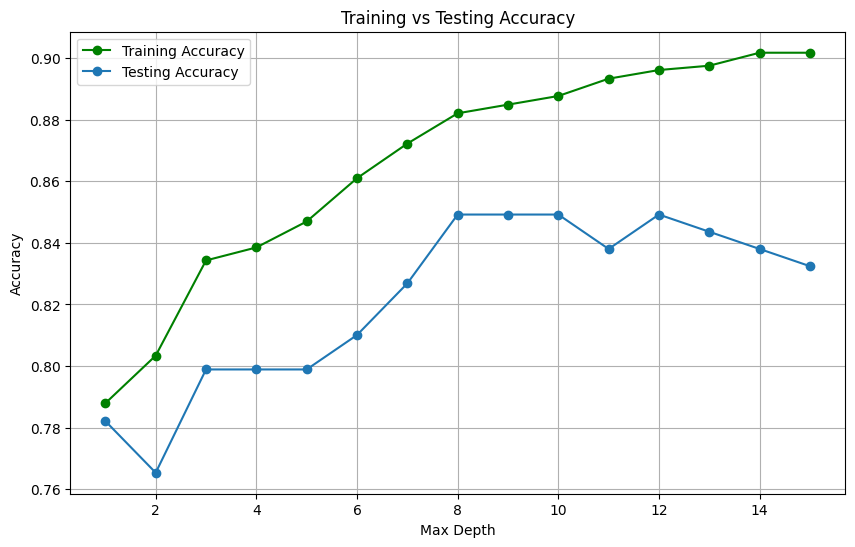

In [76]:
plt.figure(figsize=(10,6))
plt.plot(depths, train_acc, label='Training Accuracy', marker='o',color='green')
plt.plot(depths, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## OVERFITTING according to this graph

- If training accuracy is high but testing accuracy drops → overfitting.

- If both are low → underfitting.

- Ideal depth is where testing accuracy peaks and gap between train/test is minimal.


        so how much depth we should choose??
        -> The best depth is where testing accuracy peaks and the gap between training and testing is smallest.
        - Except 1 as model will be shallow/simple if we choose 1